Our jupyter notebook example to plot some bars using bytes served by Akamai origin and edge.

In [165]:
import pandas as pd
import glob
import re

# lookup all our urls files from results dir
url_files = glob.glob('results/urls*')

# a list to be used for our temp. dataframes
df_list= []

for file in url_files:
    temp_df = pd.read_csv(file)

    # our non greedy regex to get date from our url files with format
    # file format: urls-2021-11-12.csv
    file_date = re.search('.*?-(.*).csv',file).group(1)

    # convert to date without time so 2021-11-12 format
    temp_df['date'] = pd.to_datetime(file_date).date()

    # append dataframe to our temp. list
    df_list.append(temp_df)

# concatenate all our dataframes to a single dataframe using our temp. df list
# we can ignore the index as it has no meaningfull value so new index will be created
df = pd.concat(df_list, ignore_index=True)

now we have our concatinated dataframe from all files, lets creat some plots. First try plot the edge and origin bytes per day.

In [169]:
# new_df = df.sort_values(['date', 'allOriginBytes'], ascending=[True,False]).groupby('date').head(5)
# new_series = df.groupby('date')['allOriginBytes'].sum()
# let's drop the offloads percentage as we're getting the sum per date so percentage is useless
if 'allBytesOffload' in df.columns:
    df.drop(columns='allBytesOffload', inplace=True)

# calculate the sum off all columns grouped by date
# and convert to GB=3, TB=4 etc.
FORMAT = 'GB'
data_size = {
    "MB": 2,
    "GB": 3,
    "TB": 4
}

# create new dataframe grouped by data, sum the table and convert to FORMAT
sum_df = df.groupby('date').sum().div(1024.0**data_size[FORMAT]).round(0)
sum_df.head(5)

,allEdgeBytes,allOriginBytes
date,,
2021-11-12,832.0,1165.0
2021-11-15,1050.0,1477.0
2021-11-17,749.0,1068.0
2021-11-19,855.0,1210.0
2021-11-20,862.0,1219.0


Text(0, 0.5, 'GB')

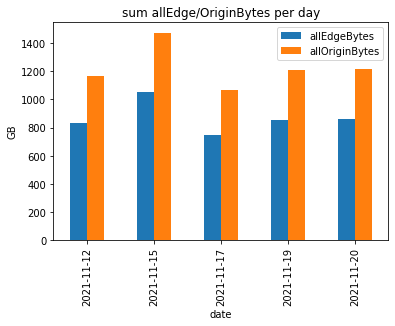

In [170]:
import matplotlib.pyplot as plt

# let's convert columns to TB 
sum_df.plot(kind='bar', title='sum allEdge/OriginBytes per day').set_ylabel(FORMAT)
